In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
rs=42

## Regresion lineal simple

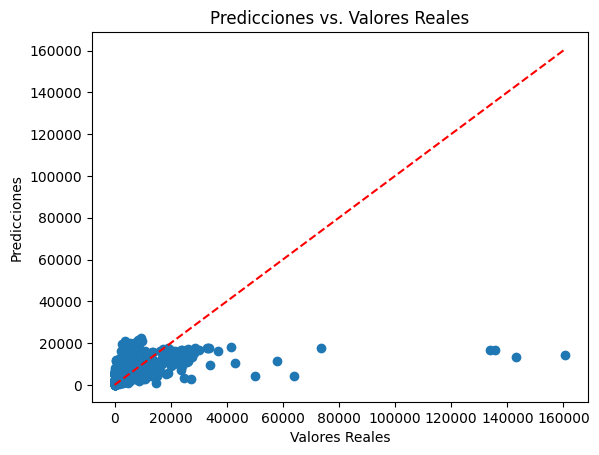

Intercept: -15590163.312281631
Coefficients: [ 7.71802180e+03 -8.41691747e+01  1.38848683e+01  1.72576352e+01
 -1.20623107e-04]
R^2: 0.15793679531867189
MAE: 5851.476768212204
MSE: 176628563.41142485
RMSE: 13290.16792261952


In [361]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

df['date'] = pd.to_datetime(df['date'])

# Crear nuevas columnas 'year', 'month' y 'day'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Selección de características y variable objetivo
X = df[['year', 'month', 'day', 'new_deceased', 'cumulative_vaccine_doses_administered']]
y = df['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## Regresion lineal simple (observando el dia anterior)

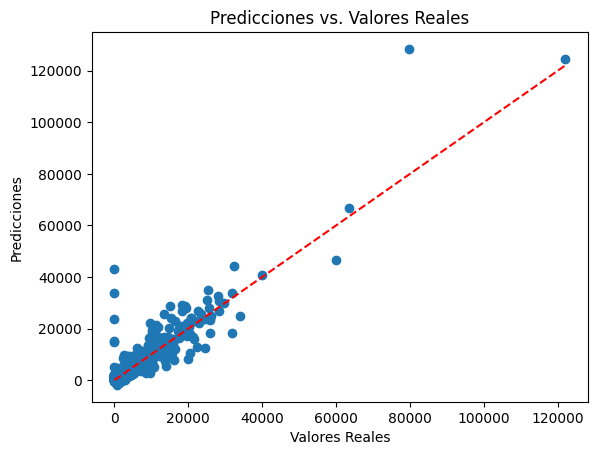

Intercept: 615.4832880635922
Coefficients: [ 7.34678062e+01 -3.42207254e-05  9.07185585e-01 -7.05258648e+01
  4.52244241e-05 -7.83773120e+02 -1.05035556e+03]
                                       Feature  Coefficient
0                                 new_deceased    73.467806
1        cumulative_vaccine_doses_administered    -0.000034
2                          new_confirmed_lag_1     0.907186
3                           new_deceased_lag_1   -70.525865
4  cumulative_vaccine_doses_administered_lag_1     0.000045
5                              country_code_CO  -783.773120
6                              country_code_PE -1050.355559
R^2: 0.7787481068326453
MAE: 2199.3594796682314
MSE: 20020572.901189398
RMSE: 4474.43548407946


In [362]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 1  # Número de días para mirar hacia atrás
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
    df[f'cumulative_vaccine_doses_administered_lag_{i}'] = df.groupby('country_code')['cumulative_vaccine_doses_administered'].shift(i)

# Eliminar filas con valores NaN (debido al desplazamiento)
df = df.dropna()

# Codificar la columna 'country_code'
df = pd.get_dummies(df, columns=['country_code'], drop_first=True)

# Selección de características y variable objetivo
feature_cols = [col for col in df.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
X = df[feature_cols]
y = df['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## Regresion lineal simple (observando los 3 dias anteriores)

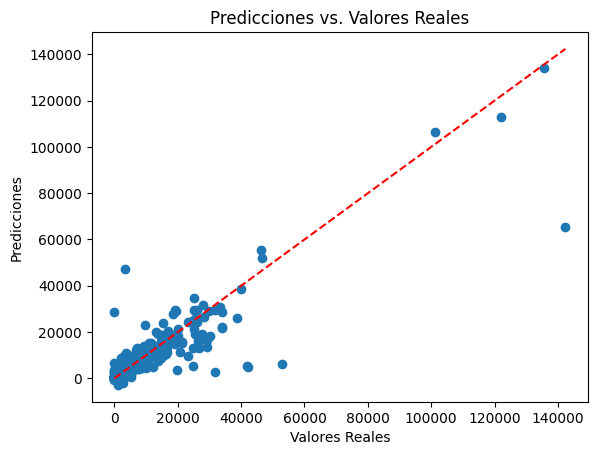

Intercept: 541.4164313287874
Coefficients: [ 6.47386036e+01 -1.62287485e-05  7.62141496e-01 -5.34153051e+01
  6.31022132e-04  6.15386426e-03 -4.11196904e+00 -5.28609348e-04
  1.35705804e-01 -5.80233918e+00 -8.98031195e-05 -5.24497327e+01
 -3.20410561e+02]
                                        Feature  Coefficient
0                                  new_deceased    64.738604
1         cumulative_vaccine_doses_administered    -0.000016
2                           new_confirmed_lag_1     0.762141
3                            new_deceased_lag_1   -53.415305
4   cumulative_vaccine_doses_administered_lag_1     0.000631
5                           new_confirmed_lag_2     0.006154
6                            new_deceased_lag_2    -4.111969
7   cumulative_vaccine_doses_administered_lag_2    -0.000529
8                           new_confirmed_lag_3     0.135706
9                            new_deceased_lag_3    -5.802339
10  cumulative_vaccine_doses_administered_lag_3    -0.000090
11          

In [363]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 3  # Número de días para mirar hacia atrás
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
    df[f'cumulative_vaccine_doses_administered_lag_{i}'] = df.groupby('country_code')['cumulative_vaccine_doses_administered'].shift(i)

# Eliminar filas con valores NaN (debido al desplazamiento)
df = df.dropna()

# Codificar la columna 'country_code'
df = pd.get_dummies(df, columns=['country_code'], drop_first=True)

# Selección de características y variable objetivo
feature_cols = [col for col in df.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
X = df[feature_cols]
y = df['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


## valor óptimo de X_days que minimiza el error del modelo

In [364]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
        df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
        df[f'cumulative_vaccine_doses_administered_lag_{i}'] = df.groupby('country_code')['cumulative_vaccine_doses_administered'].shift(i)
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    # Codificar la columna 'country_code'
    df_temp = pd.get_dummies(df_temp, columns=['country_code'], drop_first=True)
    
    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.778748  2199.359480  2.002057e+07  4474.435484
1        2  0.855405  2121.454017  1.512041e+07  3888.497343
2        3  0.788085  2456.833785  3.613844e+07  6011.525866
3        4  0.468616  2477.599983  6.182270e+07  7862.741536
4        5  0.817534  2075.480432  2.042798e+07  4519.731879
5        6  0.742949  2305.749889  4.588183e+07  6773.612596
6        7  0.871283  2029.326785  2.340803e+07  4838.184280
7        8  0.925190  1420.720711  1.236091e+07  3515.809160
8        9  0.838847  1609.689023  2.135226e+07  4620.851053
9       10  0.855306  1623.271237  1.876604e+07  4331.979133
10      11  0.867981  1549.210144  1.819869e+07  4265.992600
11      12  0.661778  1924.494108  4.031826e+07  6349.666003
12      13  0.799209  1633.280741  3.268297e+07  5716.902475
13      14  0.817815  1693.455823  3.258771e+07  5708.564821
14      15  0.847931  1687.595409  2.302813e+07  4798.763425
15      16  0.865589  17

## valor óptimo de X_days que minimiza el error del modelo (solo con nuevos confirmados)

In [365]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    # Codificar la columna 'country_code'
    df_temp = pd.get_dummies(df_temp, columns=['country_code'], drop_first=True)
    
    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.761045  2055.552362  2.162248e+07  4649.997355
1        2  0.833691  2028.702340  1.739103e+07  4170.254863
2        3  0.783493  2296.623777  3.692156e+07  6076.311236
3        4  0.807567  2024.917085  2.238825e+07  4731.622123
4        5  0.792237  1958.840920  2.326002e+07  4822.863836
5        6  0.788293  2117.932994  3.778823e+07  6147.212810
6        7  0.864529  1977.388149  2.463628e+07  4963.494279
7        8  0.951832  1275.023545  7.958768e+06  2821.128804
8        9  0.941654  1362.963069  7.730670e+06  2780.408170
9       10  0.914953  1481.220369  1.103015e+07  3321.167369
10      11  0.905588  1399.019919  1.301456e+07  3607.569568
11      12  0.894487  1548.844336  1.257782e+07  3546.522377
12      13  0.909805  1349.677016  1.468112e+07  3831.594823
13      14  0.927214  1392.354214  1.301931e+07  3608.227484
14      15  0.944402  1366.536804  8.419254e+06  2901.595082
15      16  0.939239  14

## valor óptimo de X_days que minimiza el error del modelo (solo con nuevos confirmados) + dia de la semana

In [366]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    
    # Codificar la columna 'country_code' y 'day_of_week'
    df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)
    


    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.789711  2109.790359  1.902854e+07  4362.171550
1        2  0.857558  2152.036591  1.489533e+07  3859.446384
2        3  0.802035  2382.562162  3.375943e+07  5810.286317
3        4  0.834455  2091.482900  1.925998e+07  4388.619204
4        5  0.812127  2140.743780  2.103330e+07  4586.207131
5        6  0.800020  2226.110020  3.569503e+07  5974.531531
6        7  0.875166  2052.468389  2.270186e+07  4764.646464
7        8  0.952206  1300.545983  7.896982e+06  2810.156898
8        9  0.941738  1375.683252  7.719602e+06  2778.417239
9       10  0.916013  1482.776752  1.089261e+07  3300.395353
10      11  0.903562  1434.261376  1.329393e+07  3646.083741
11      12  0.896005  1545.899054  1.239689e+07  3520.922432
12      13  0.909613  1362.126753  1.471237e+07  3835.671240
13      14  0.927591  1422.517840  1.295196e+07  3598.882518
14      15  0.944305  1384.292454  8.434022e+06  2904.138825
15      16  0.939843  14

## 8 dias anteriores + dia de la semana

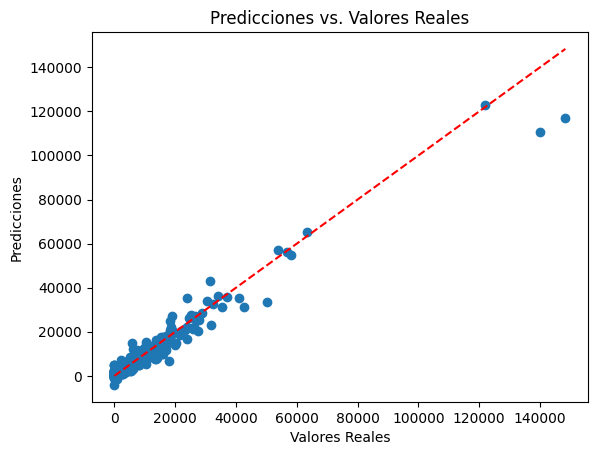

Intercept: 444.06564962601806
Coefficients: [ 9.04602518e-01  1.15197315e-06  7.92134882e-01 -1.88289876e-02
  4.87003953e-02  1.76823917e-04  2.53912913e-02 -1.21211547e-02
  8.24528787e-01 -7.13273185e-01 -1.25503498e+02 -3.46835403e+02
  2.26374023e+02 -6.28467660e+02 -6.73874796e+02  1.17287702e+02
 -7.37087547e+01  1.14745348e+02]
                                  Feature  Coefficient
0                            new_deceased     0.904603
1   cumulative_vaccine_doses_administered     0.000001
2                     new_confirmed_lag_1     0.792135
3                     new_confirmed_lag_2    -0.018829
4                     new_confirmed_lag_3     0.048700
5                     new_confirmed_lag_4     0.000177
6                     new_confirmed_lag_5     0.025391
7                     new_confirmed_lag_6    -0.012121
8                     new_confirmed_lag_7     0.824529
9                     new_confirmed_lag_8    -0.713273
10                        country_code_CO  -125.503498
11

In [367]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 8  # Número de días para mirar hacia atrás
# Crear características basadas en los últimos X días
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)



# Eliminar filas con valores NaN (debido al desplazamiento)
df_temp = df.dropna()


# Codificar la columna 'country_code' y 'day_of_week'
df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)



# Selección de características y variable objetivo
feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
X = df_temp[feature_cols]
y = df_temp['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
    
# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

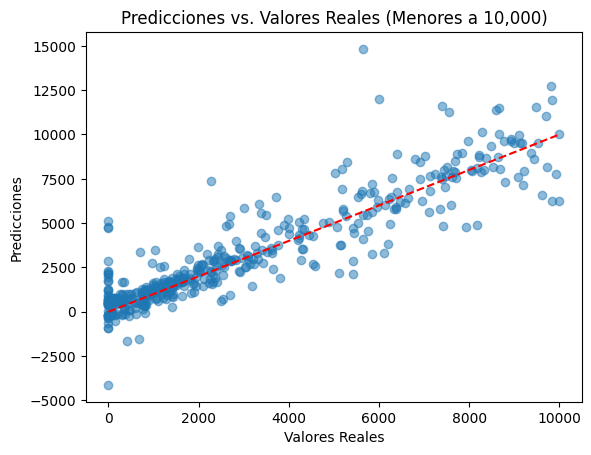

In [371]:
# Filtrar los datos para valores reales menores a 10,000
filter_condition = y_test < 10000
y_test_filtered = y_test[filter_condition]
y_pred_filtered = y_pred[filter_condition]

# Visualizar predicciones vs. valores reales
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Menores a 10,000)')
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], color='red', linestyle='--')
plt.show()


## modelo solo con los X dias anteriores (no incluye el dia actual)

In [374]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    
    # Codificar la columna 'country_code' y 'day_of_week'
    df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)
    


    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.789533  2079.911748  1.904463e+07  4364.015762
1        2  0.853695  2197.258104  1.529923e+07  3911.422625
2        3  0.803358  2406.904654  3.353380e+07  5790.837394
3        4  0.834243  2103.419567  1.928461e+07  4391.424531
4        5  0.811648  2143.810474  2.108686e+07  4592.043040
5        6  0.802469  2252.506331  3.525796e+07  5937.841683
6        7  0.875605  2031.656465  2.262212e+07  4756.272102
7        8  0.952459  1317.842705  7.855178e+06  2802.709088
8        9  0.941592  1387.855795  7.738936e+06  2781.894302
9       10  0.915523  1496.562592  1.095617e+07  3310.010214
10      11  0.903796  1438.189747  1.326166e+07  3641.656313
11      12  0.895776  1548.445321  1.242414e+07  3524.789556
12      13  0.909257  1363.294750  1.477028e+07  3843.212433
13      14  0.926947  1449.898160  1.306704e+07  3614.836130
14      15  0.944265  1396.888080  8.440080e+06  2905.181512
15      16  0.939553  14

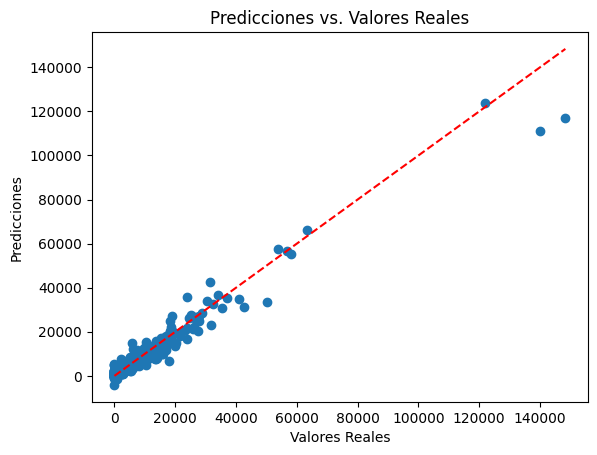

Intercept: 528.5832886028074
Coefficients: [ 7.90714957e-01 -1.65781338e-02  4.77823176e-02  4.00600559e-05
  2.67430626e-02 -1.21667928e-02  8.26663570e-01 -7.10737393e-01
 -4.74050201e+01 -2.10175048e+02  2.38565889e+02 -6.31858640e+02
 -6.73637208e+02  1.18715727e+02 -6.97328594e+01  1.09367289e+02]
                  Feature  Coefficient
0     new_confirmed_lag_1     0.790715
1     new_confirmed_lag_2    -0.016578
2     new_confirmed_lag_3     0.047782
3     new_confirmed_lag_4     0.000040
4     new_confirmed_lag_5     0.026743
5     new_confirmed_lag_6    -0.012167
6     new_confirmed_lag_7     0.826664
7     new_confirmed_lag_8    -0.710737
8         country_code_CO   -47.405020
9         country_code_PE  -210.175048
10     day_of_week_Monday   238.565889
11   day_of_week_Saturday  -631.858640
12     day_of_week_Sunday  -673.637208
13   day_of_week_Thursday   118.715727
14    day_of_week_Tuesday   -69.732859
15  day_of_week_Wednesday   109.367289
R^2: 0.9524592999909445
MAE: 1317

In [375]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 8  # Número de días para mirar hacia atrás
# Crear características basadas en los últimos X días
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)



# Eliminar filas con valores NaN (debido al desplazamiento)
df_temp = df.dropna()


# Codificar la columna 'country_code' y 'day_of_week'
df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)



# Selección de características y variable objetivo
feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered']]
X = df_temp[feature_cols]
y = df_temp['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
    
# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')